# Crab Age Prediction & EDA
![alt](https://www.creativefabrica.com/wp-content/uploads/2022/08/24/Smile-Crab-Cartoon-Character-Underwater-Graphics-36951622-1-1-580x387.png)




# CONTENTS:
* [1. Importing Libraries](#1)
* [2. Importing Dataset](#2)
* [3. Data Content](#3)
* [4. Exploratory Analysis](#4)
* [5. Data Visualization](#5)
* [6. Outlier Detection](#6)
* [7. Data Preprocessing](#7)
* [8. Model Building](#8)
* [9. Model Training](#9)
* [10.Feature Importance](#10)
* [11. Model Tuning](#11)
* [12. Model Prediction](#12)
* [13. Visualization results](#13)
* [14. Submission](#14)

### [1. IMPORTING LIBRARIES](#1)

In [114]:
#importing libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from scipy.stats import norm, skew
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings("ignore")

### [2. IMPORTING DATASET](#2)

In [115]:
#importing dataset

data=pd.read_csv("CrabAgePrediction.csv")
df=data.copy()
df.head()

Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0   F  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1   M  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2   I  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3   F  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4   I  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  
0      6.747181    9  
1      1.559222    6  
2      2.764076    6  
3      5.244657   10  
4      1.700970    6

### [3. DATA CONTENT](#3)

* Sex:
Gender of the Crab - Male, Female and Indeterminate.
* Length:
Length of the Crab (in Feet; 1 foot = 30.48 cms)
* Diameter:
Diameter of the Crab (in Feet; 1 foot = 30.48 cms)
* Height:
Height of the Crab (in Feet; 1 foot = 30.48 cms)
* Weight:
Weight of the Crab (in ounces; 1 Pound = 16 ounces)
* Shucked Weight:
Weight without the shell (in ounces; 1 Pound = 16 ounces)
* Viscera Weight:
is weight that wraps around your abdominal organs deep inside body (in ounces; 1 Pound = 16 ounces)
* Shell Weight:
Weight of the Shell (in ounces; 1 Pound = 16 ounces)
* Age:
Age of the Crab (in months)



### [4. EXPLORATORY ANALYSIS](#4)

```python

In [116]:
# shape of dataset
df.shape

(3893, 9)

In [117]:
# info about dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [118]:
# checking null values
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

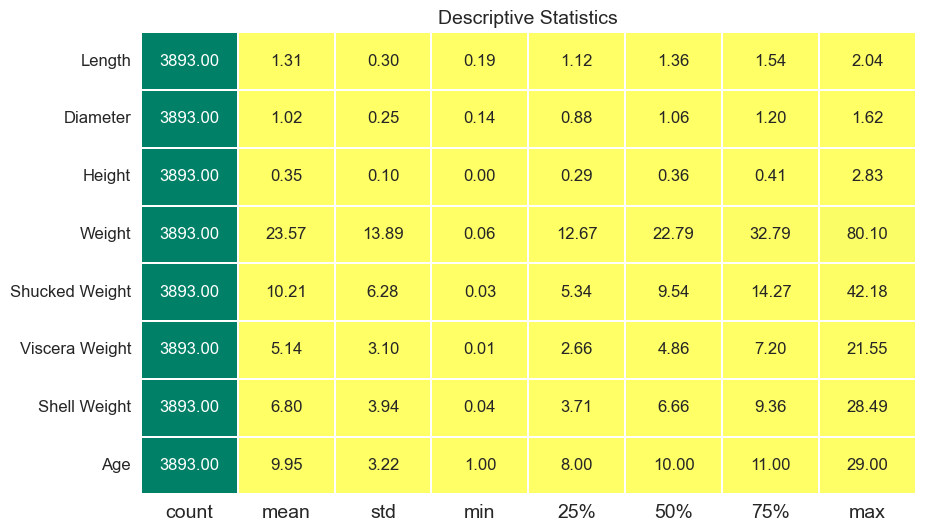

In [119]:
# statistical summary of numerical columns
num_cols =df.drop(["Sex"],axis=1).columns
cmap1 = 'summer_r'
def desc_stats(dataframe):
    desc = dataframe.describe().T
    f,ax = plt.subplots(figsize=(10,
                                 desc.shape[0] * 0.75))
    sns.heatmap(desc,
                annot = True,
                cmap = cmap1,
                fmt= '.2f',
                ax = ax,
                linecolor = 'white',
                linewidths = 1.3,
                cbar = False,
                annot_kws = {"size": 12})
    plt.xticks(size = 14)
    plt.yticks(size = 12,
               rotation = 0)
    plt.title("Descriptive Statistics", size = 14)
    plt.show()
    
desc_stats(df[num_cols])

### [5. DATA VISUALIZATION](#5)
<p style="padding: 10px;
          color: #7DBCE6;
          text-align: center;
          font-family:Verdana;
          font-size:190%;">

</p>
<img src="https://media.tenor.com/aR6BdEkpSMIAAAAj/crab-stab.gif"> 


In [120]:
df.head()
df["Sex"].unique()

array(['F', 'M', 'I'], dtype=object)

In [121]:
# Relationship all variables with Age:
features = ["Sex","Length","Diameter","Height","Weight","Shucked Weight","Viscera Weight","Shell Weight"]

for i in features:
    if not i == "Sex":
        fig=px.scatter(df,x="Age",y=i,template="plotly_dark",color="Sex",title="Age-"+i) 
        fig.show()

<Axes: >

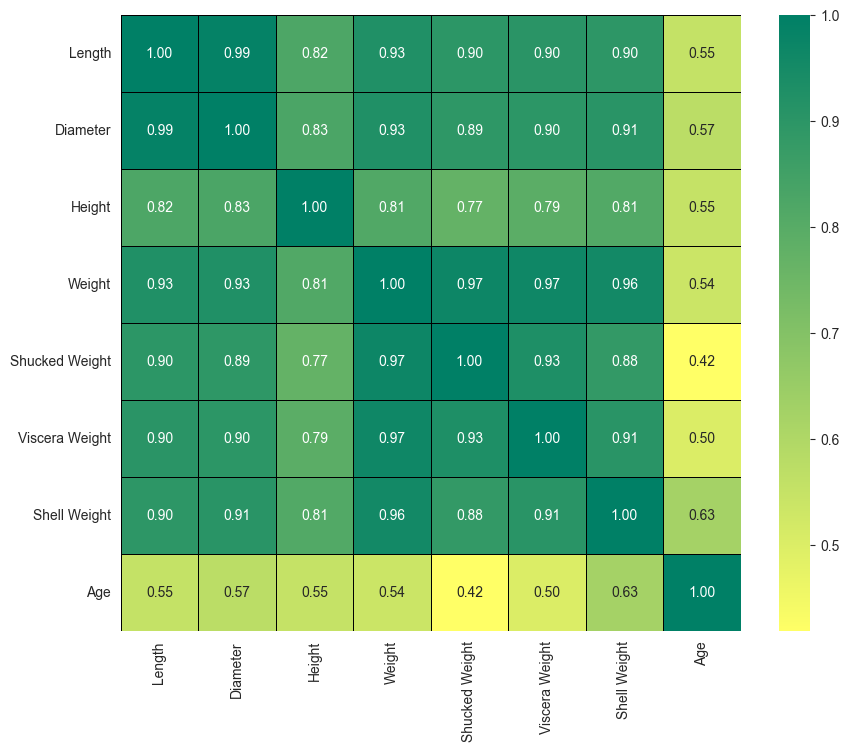

In [122]:
# Correlation Matrix:

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="summer_r",linewidths=0.5,linecolor="black",fmt=".2f")

Text(0.5, 1.0, 'Distribution of all Variables')

<Figure size 2000x2000 with 0 Axes>

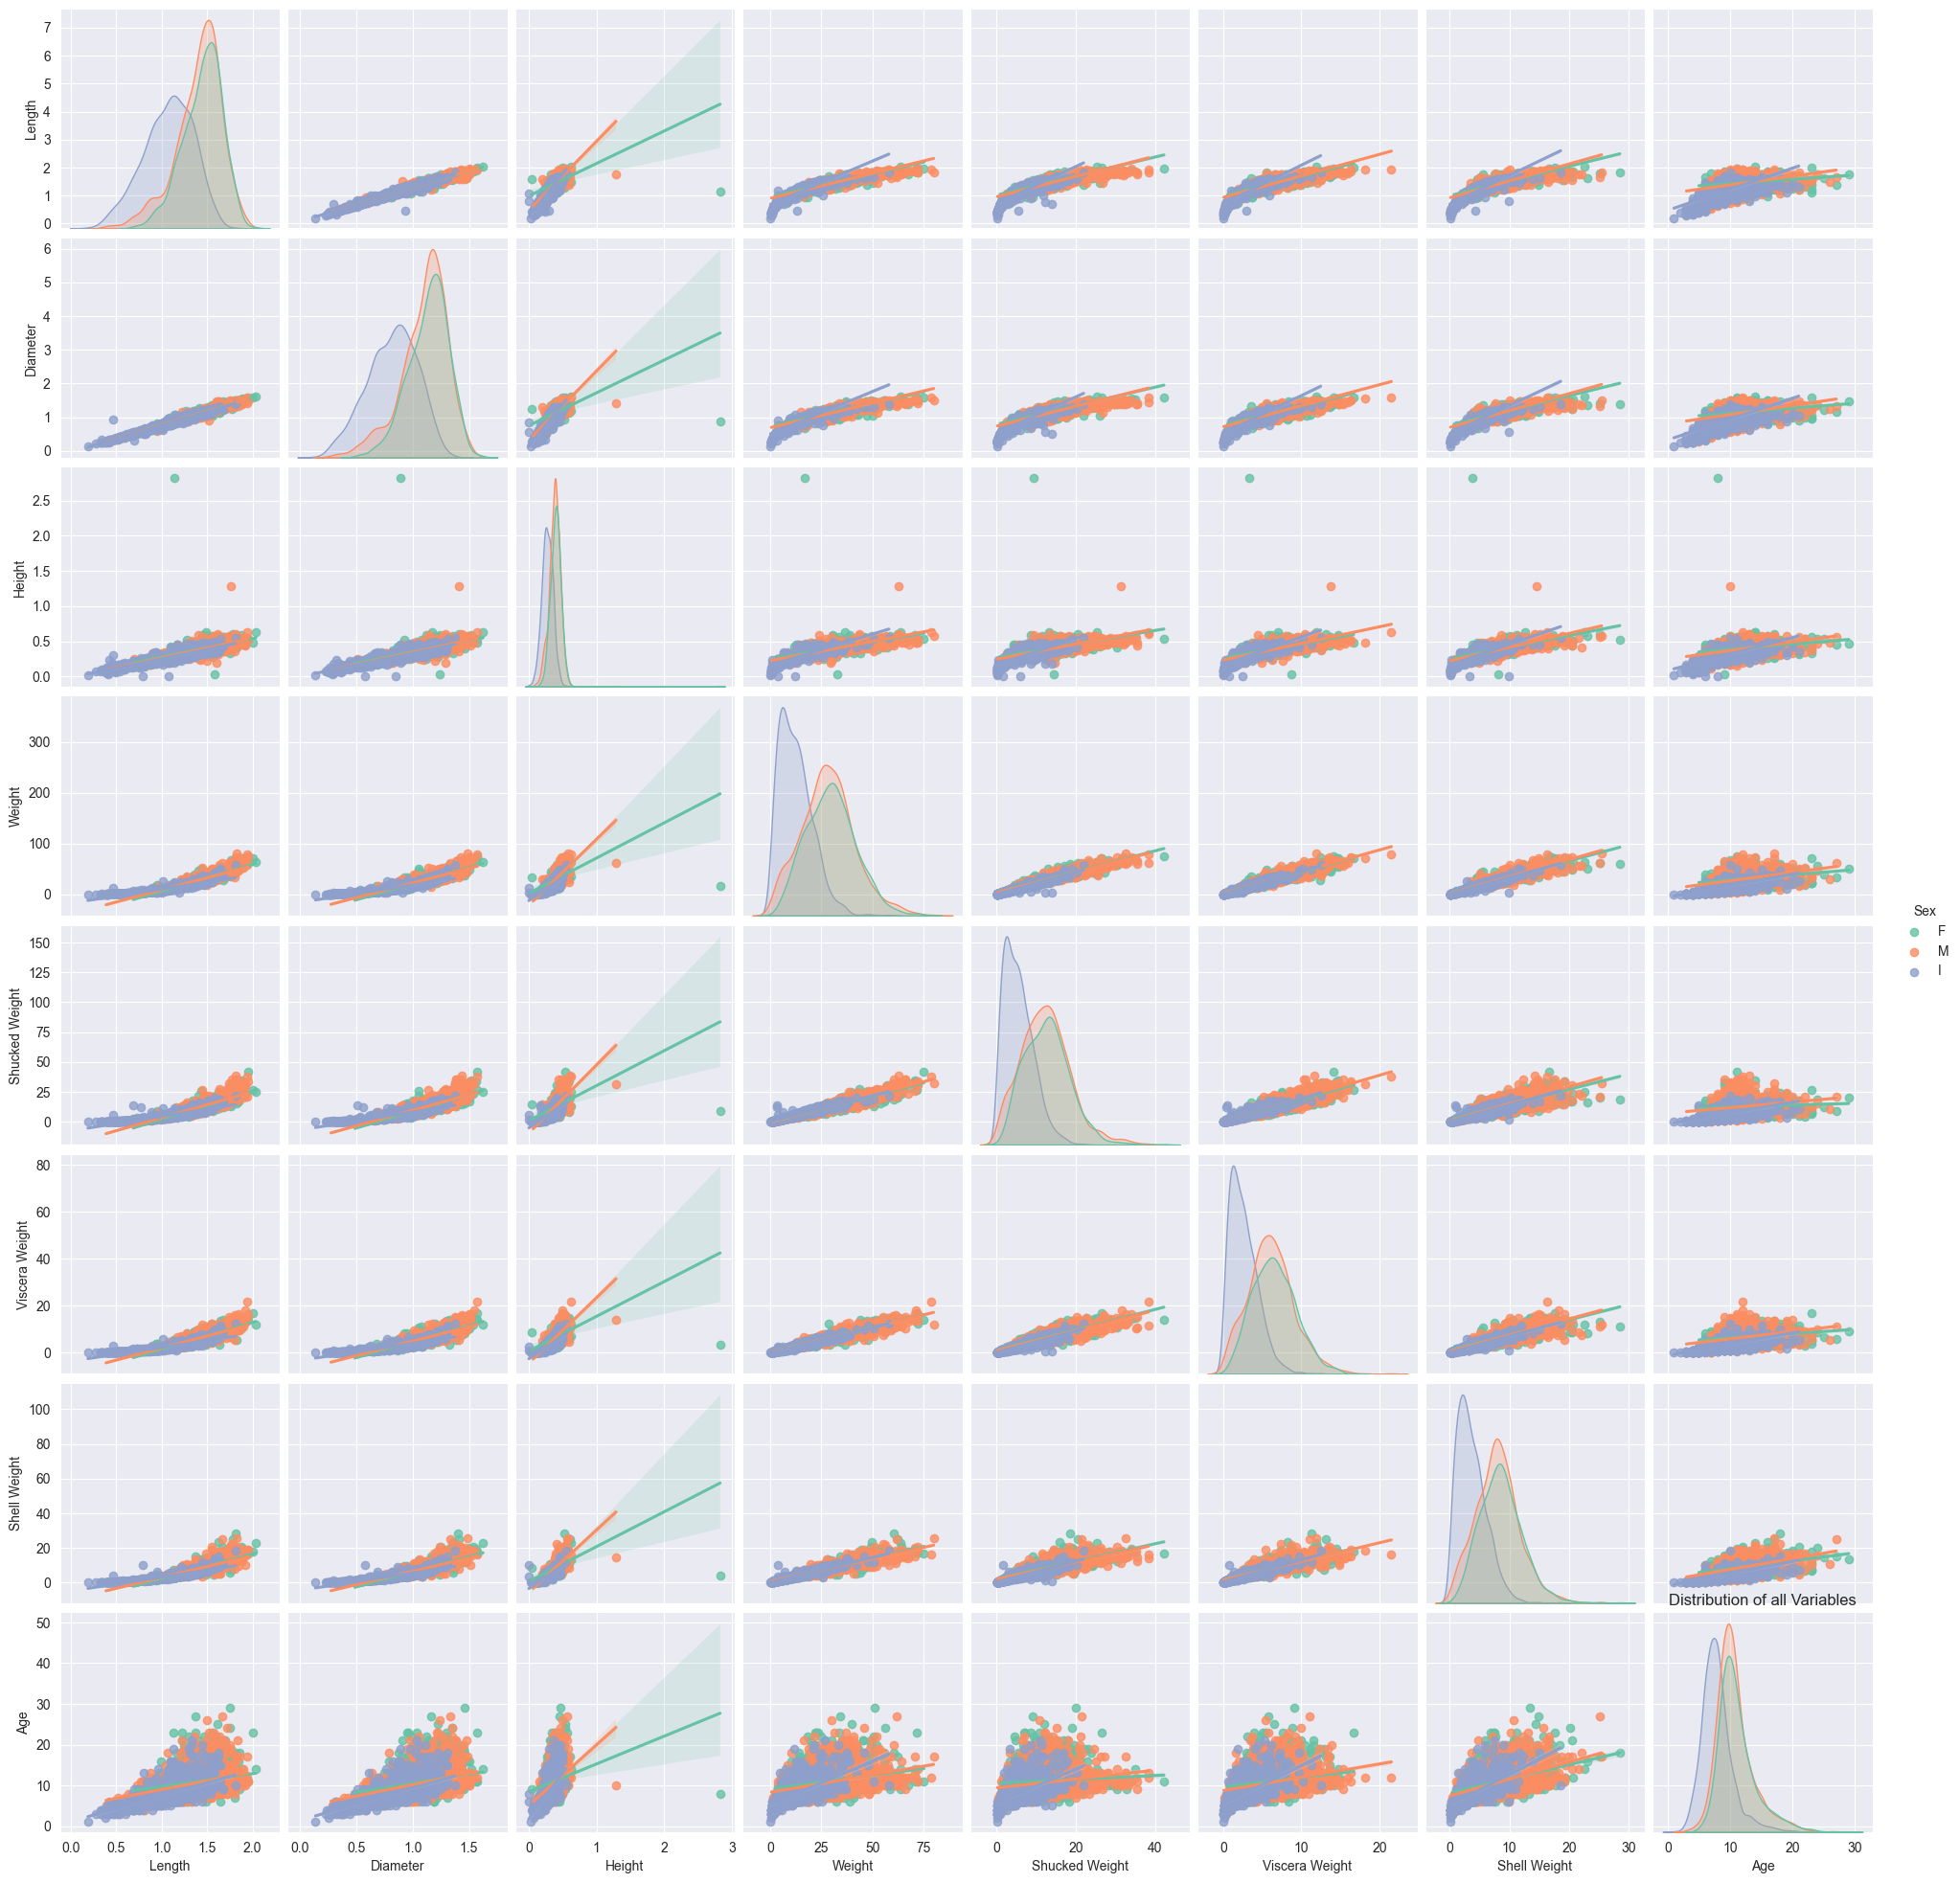

In [123]:
# distribution of all variables based on Sex:
plt.figure(figsize=(20,20))
sns.set_style("darkgrid")
sns.pairplot(df,hue="Sex",diag_kind="kde",kind="reg",palette="Set2")
plt.title("Distribution of all Variables")

In [124]:
df.head()

Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0   F  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1   M  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2   I  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3   F  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4   I  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  
0      6.747181    9  
1      1.559222    6  
2      2.764076    6  
3      5.244657   10  
4      1.700970    6

In [125]:
# plotting numerical variables distribution:
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
colors = ['#7DBCE6','#EEBDEE','#EAEAAF','#8FE195','#E28181',
          '#87D8DB','#C2E37D','#DF93A4','#DCB778','#C497DE']

num_cols=['Length','Diameter','Height','Weight','Shucked Weight','Viscera Weight','Shell Weight','Age']

def num_summary(dataframe, col_name):
    fig = make_subplots(rows=1,cols=2,
                        subplot_titles=('Quantiles','Distribution'))

    fig.add_trace(go.Histogram(x = dataframe[col_name],
                               xbins = dict(start = dataframe[col_name].min(),
                                            end = dataframe[col_name].max()),
                               showlegend = False,
                               name = str(col_name),
                               marker=dict(color=colors[0],
                                           line = dict(color = '#DBE6EC',
                                                       width = 1))
                              ),
                  row = 1, col = 1)
    
    fig.add_trace(go.Box(y=dataframe[col_name],
                         name = str(col_name),
                         showlegend = False,
                         marker_color = colors[1]),
                  row = 1, col = 2)
    
  
    fig.update_layout(title = {'text': col_name,
                               'y':0.9,
                               'x':0.5,
                               'xanchor': 'center',
                               'yanchor': 'top'},
                      template = "plotly_dark")
    
    iplot(fig)

for i in num_cols:
    num_summary(df,i)

In [126]:
df.head()

Sex  Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0   F  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1   M  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2   I  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3   F  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4   I  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  
0      6.747181    9  
1      1.559222    6  
2      2.764076    6  
3      5.244657   10  
4      1.700970    6

### [6. OUTLIER DETECTİON](#6)

In [127]:
# outlier detection:
df_num=df.select_dtypes(include=["float64","int64"])
for i in df_num.columns:
    fig=px.box(df,y=i,color="Sex",template="plotly_dark",title="Boxplot of "+i)
    fig.update_layout(title= dict(text = 'Boxplot of '+i,
                                x = 0.5,
                                y = 0.95,
                                xanchor = 'center',
                                yanchor = 'top'),
                    xaxis = dict(title = i),
                    yaxis = dict(categoryorder='total ascending'),
                    font=dict(family ='Verdana',
                            size = 14),
                    template="plotly_dark")
    fig.show()

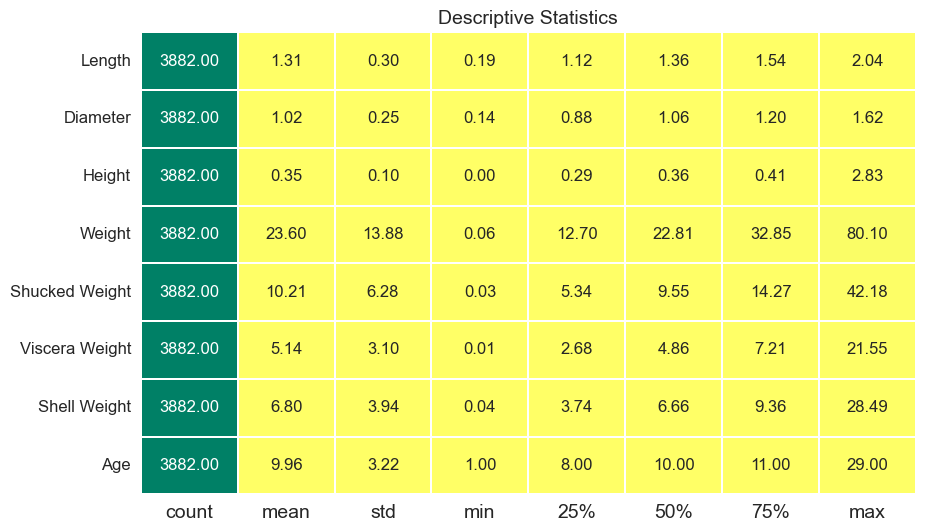

In [128]:
# filling outliers in numerical columns:

from sklearn.neighbors import LocalOutlierFactor

df_table=df_num

clf=LocalOutlierFactor(n_neighbors=20,contamination=0.1) 
clf.fit_predict(df_table)
df_scores=clf.negative_outlier_factor_

threshold=np.sort(df_scores)[10] #threshold value

outlier_tf=df_scores>threshold
outlier_tf

new_df=df_table[df_scores>threshold] #outliers are removed

new_df["Sex"]=df["Sex"]
df=new_df.copy()

desc_stats(df)


### [7. DATA PREPROCESSING](#6)

In [129]:
# encoding categorical variable

#one hot encoding:
df=pd.get_dummies(df,drop_first=False)

df.head()

Length  Diameter  Height     Weight  Shucked Weight  Viscera Weight  \
0  1.4375    1.1750  0.4125  24.635715       12.332033        5.584852   
1  0.8875    0.6500  0.2125   5.400580        2.296310        1.374951   
2  1.0375    0.7750  0.2500   7.952035        3.231843        1.601747   
3  1.1750    0.8875  0.2500  13.480187        4.748541        2.282135   
4  0.8875    0.6625  0.2125   6.903103        3.458639        1.488349   

   Shell Weight  Age  Sex_F  Sex_I  Sex_M  
0      6.747181    9      1      0      0  
1      1.559222    6      0      0      1  
2      2.764076    6      0      1      0  
3      5.244657   10      1      0      0  
4      1.700970    6      0      1      0

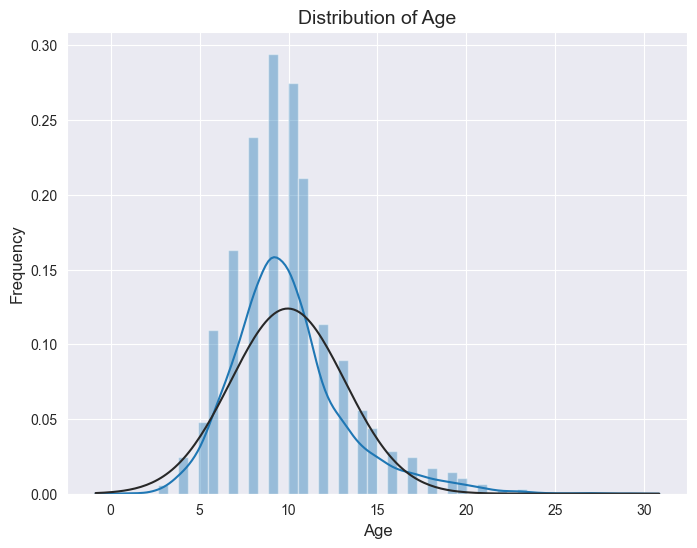

mean: 9.962648119526017 standart deviation = 3.2198982058099723


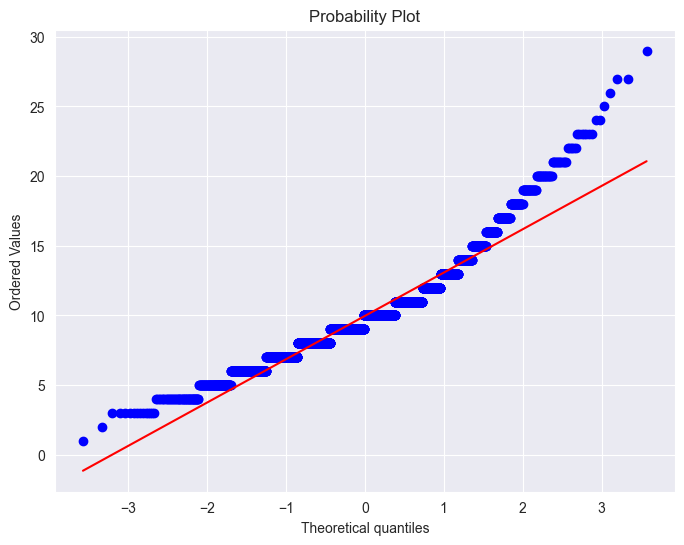

In [130]:
## Feature engineering:

#showing distribution of dependent variable:

plt.figure(figsize = (8, 6))
sns.distplot(df.Age, fit= norm )
plt.title("Distribution of Age", size = 14)
plt.xlabel("Age", size = 12)
plt.ylabel("Frequency", size = 12)
plt.show()

(mu, sigma) = norm.fit(df["Age"]) #mu: mean, sigma: standard deviation

print("mean: {} standart deviation = {}".format(mu, sigma))

# QQ plot: to check if the distribution is normal or not:

plt.figure(figsize = (8, 6))
plt.title("QQ Plot")
stats.probplot(df.Age, plot = plt)
plt.show()

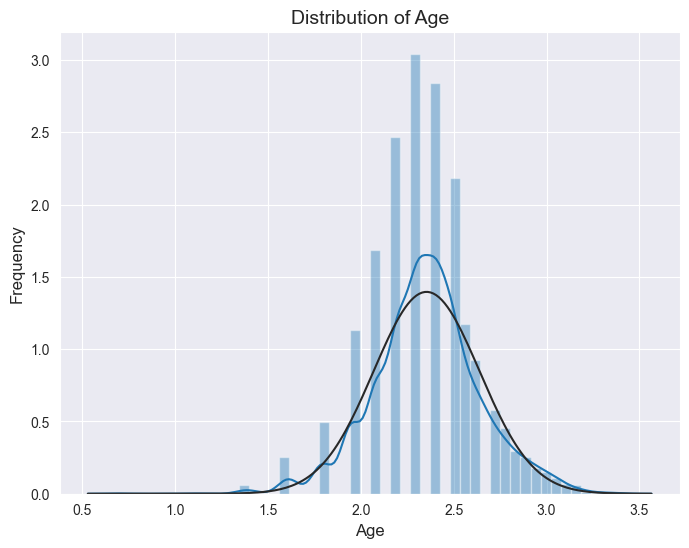

mean: 9.962648119526017 standart deviation = 3.2198982058099723


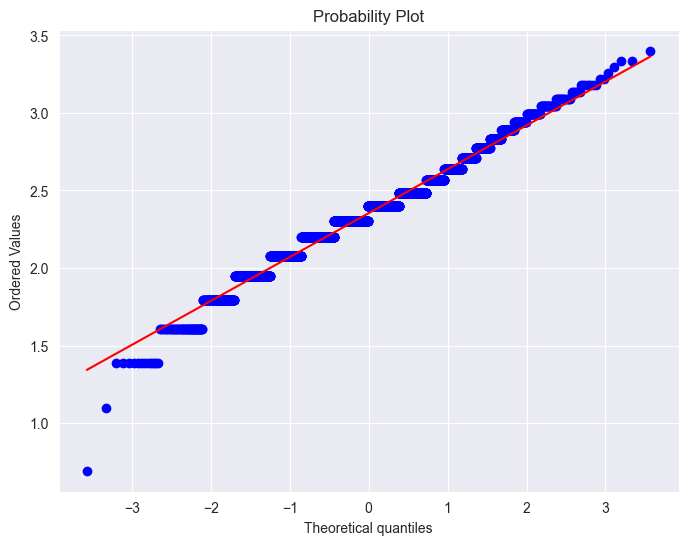

In [131]:
# applying log transformation to Age variable:
df['Age'] = np.log1p(df['Age']) #log1p: log(1+x)


sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.distplot(df.Age, fit= norm) #fit=norm: normal distribution
plt.title("Distribution of Age", size = 14)
plt.ylabel("Frequency", size = 12)
plt.xlabel("Age", size = 12)
plt.show()
print("mean: {} standart deviation = {}".format(mu, sigma))

# QQ plot again:

plt.figure(figsize = (8, 6))
plt.title("QQ Plot")
stats.probplot(df.Age, plot = plt)
plt.show()

In [132]:


# check skewness of independent variables:

#if skewness is  greater than 1, the distribution has positive skewness.
#if skewness is  less than -1, the distribution has negative skewness.

df_ind=df.drop("Age",axis=1)    #independent variables

skew_features = df_ind.apply(lambda x: skew(x)).sort_values(ascending=False)

skewness = pd.DataFrame({'Skew' :skew_features})
skewness

# there is positive skewness in height variable,too. So, we will apply log transformation to make it normal.


Skew
Height          3.346167
Sex_F           0.796310
Sex_I           0.793742
Shucked Weight  0.703163
Shell Weight    0.608489
Viscera Weight  0.576353
Sex_M           0.541200
Weight          0.518684
Diameter       -0.621099
Length         -0.655068

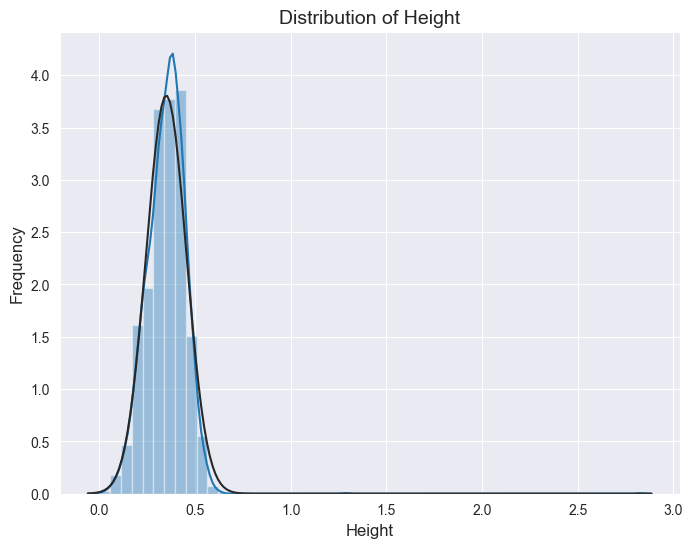

mean: 0.34963936115404437 standart deviation = 0.10477260048244291


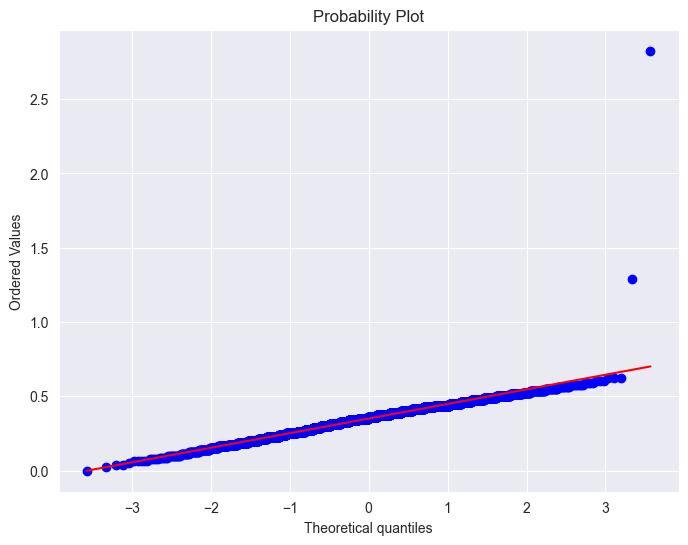

In [133]:
# showing distribution of height variable:
plt.figure(figsize = (8, 6))
sns.distplot(df.Height, fit= norm )
plt.title("Distribution of Height", size = 14)
plt.xlabel("Height", size = 12)
plt.ylabel("Frequency", size = 12)
plt.show()

(mu, sigma) = norm.fit(df["Height"]) #mu: mean, sigma: standard deviation

print("mean: {} standart deviation = {}".format(mu, sigma))

# QQ plot: to check if the distribution is normal or not:

plt.figure(figsize = (8, 6))
plt.title("QQ Plot")
stats.probplot(df.Height, plot = plt)
plt.show()


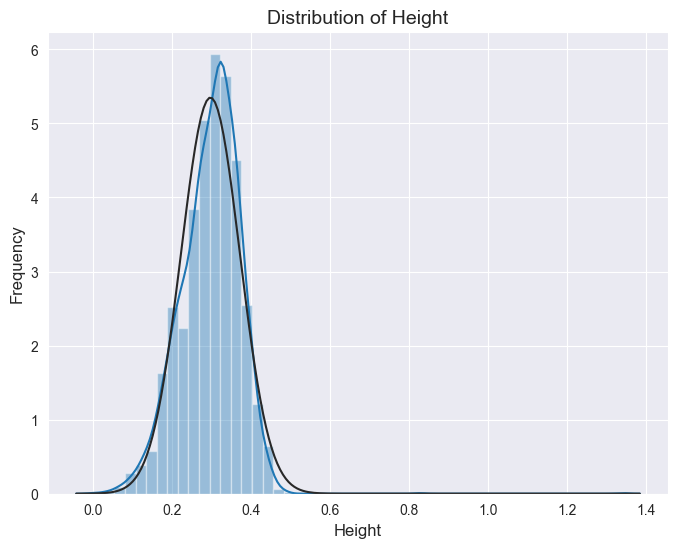

mean: 0.34963936115404437 standart deviation = 0.10477260048244291


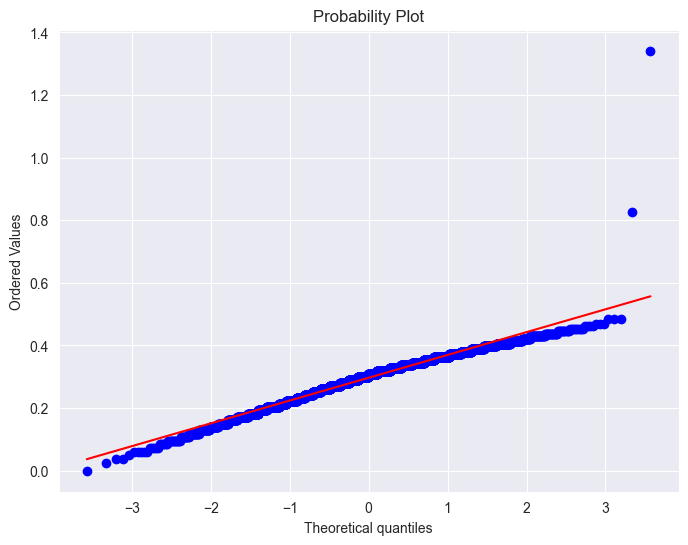

In [134]:

# applying log transformation to height variable:
df['Height'] = np.log1p(df['Height']) #log1p: log(1+x)


sns.set_style('darkgrid')
plt.figure(figsize = (8, 6))
sns.distplot(df.Height, fit= norm) #fit=norm: normal distribution
plt.title("Distribution of Height", size = 14)
plt.ylabel("Frequency", size = 12)
plt.xlabel("Height", size = 12)
plt.show()
print("mean: {} standart deviation = {}".format(mu, sigma))

# QQ plot again:

plt.figure(figsize = (8, 6))
plt.title("QQ Plot")
stats.probplot(df.Height, plot = plt)
plt.show()

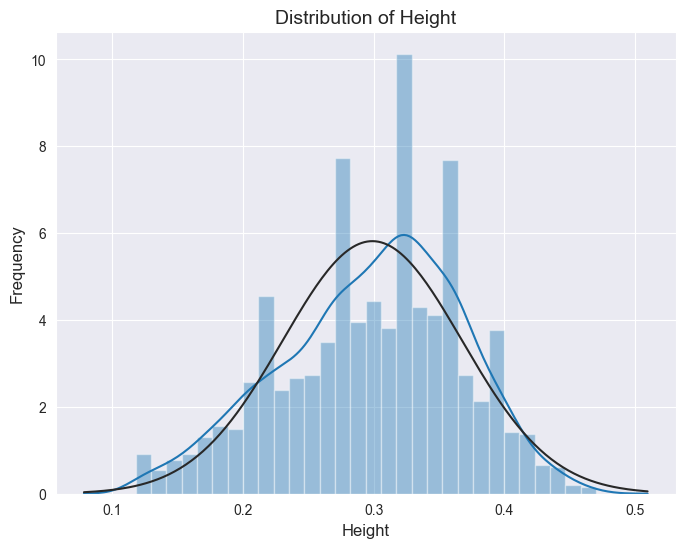

mean: 0.29892005274701683 standart deviation = 0.06860825670718163


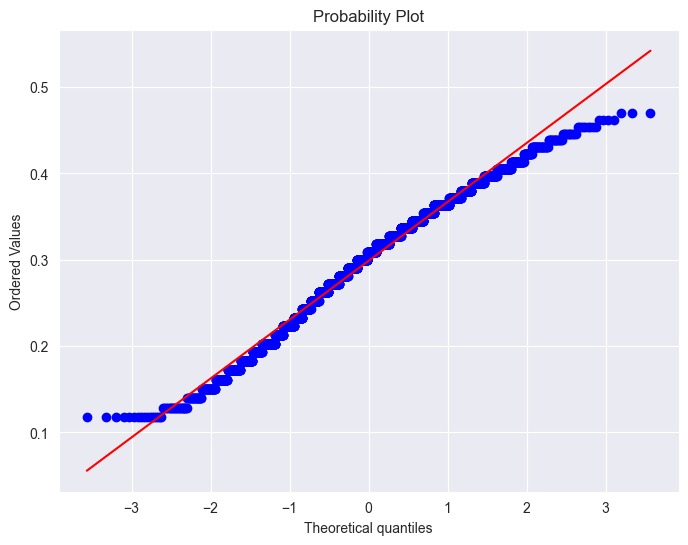

In [135]:
# I could'nt solve positive skewness in Height variable with this method. So, I will remove outliers in Height variable.

# removing outliers in height column:

Q1=df["Height"].quantile(0.25)
Q3=df["Height"].quantile(0.75)
IQR=Q3-Q1

lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

df=df[(df["Height"]>lower_limit)&(df["Height"]<upper_limit)]

# After removing outliers in height variable.

# showing distribution of height variable:
plt.figure(figsize = (8, 6))
sns.distplot(df.Height, fit= norm )
plt.title("Distribution of Height", size = 14)
plt.xlabel("Height", size = 12)
plt.ylabel("Frequency", size = 12)
plt.show()

(mu, sigma) = norm.fit(df["Height"]) #mu: mean, sigma: standard deviation

print("mean: {} standart deviation = {}".format(mu, sigma))

# QQ plot: to check if the distribution is normal or not:

plt.figure(figsize = (8, 6))
plt.title("QQ Plot")
stats.probplot(df.Height, plot = plt)
plt.show()


### [8. MODEL BUILDING](#8)

In [136]:
X=df.drop(["Age"],axis=1)
y=df["Age"].values.reshape(-1,1)

# Train test split:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# scaling the data:

sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

y_train[0:10]


array([[2.30258509],
       [2.7080502 ],
       [2.19722458],
       [2.56494936],
       [1.60943791],
       [2.19722458],
       [2.30258509],
       [2.30258509],
       [2.63905733],
       [2.63905733]])

### [9. MODEL TRAINING AND EVALUATİNG](#9)

In [137]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor


svc = SVR()
li=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
knn=KNeighborsRegressor()
xg=XGBRegressor()
lg=LGBMRegressor()
ab=AdaBoostRegressor()
gb=GradientBoostingRegressor()


names = ["Linear Regression","Decision Tree","Random Forest","KNN","SVM","XGBoost","LGBM","AdaBoost","GradientBoosting"]
classifiers = [li,dt,rf,knn,svc,xg,lg,ab,gb]


In [138]:
#training and evaluating the models:

for name, clf in zip(names, classifiers):   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 
    clf.fit(X_train, y_train)
    pred=clf.predict(X_test)
    
    score = clf.score(X_test, y_test)
        
    print("{}: test set score: {} ".format(name, score))
        
    score_train = clf.score(X_train, y_train)
    
    print("{}: train set score: {} ".format(name, score_train))
    
    mse=mean_squared_error(y_test,clf.predict(X_test))
    
    print("{}: mean squared error: {} ".format(name, mse))
    
    rmse=np.sqrt(mse)
    
    print("{}: root mean squared error: {}".format(name, rmse))
    
    print("R2 score: ",r2_score(y_test,pred))
    
    print("******************************")


Linear Regression: test set score: 0.5816602651839176 
Linear Regression: train set score: 0.5796485983896765 
Linear Regression: mean squared error: 0.031179641742710373 
Linear Regression: root mean squared error: 0.17657757995484696
R2 score:  0.5816602651839176
******************************
Decision Tree: test set score: 0.22907474360359759 
Decision Tree: train set score: 1.0 
Decision Tree: mean squared error: 0.05745849916794204 
Decision Tree: root mean squared error: 0.23970502532892804
R2 score:  0.22907474360359759
******************************
Random Forest: test set score: 0.5886386447597132 
Random Forest: train set score: 0.9440962709324641 
Random Forest: mean squared error: 0.030659530079844757 
Random Forest: root mean squared error: 0.17509862957728925
R2 score:  0.5886386447597132
******************************
KNN: test set score: 0.5767905855114066 
KNN: train set score: 0.7110667980907148 
KNN: mean squared error: 0.03154258806349771 
KNN: root mean squared err

* According R2 score and RMSE values, I choose Gradient Boosting for prediction.

### [10. FEATURE IMPORTANCE](#10)

In [139]:
# Feature importance for GradientBoostingRegressor:

#Feature Importance:

for i in [gb]:
    feature_imp=pd.Series(i.feature_importances_,index=X.columns).sort_values(ascending=False)
    print(feature_imp)
   
    print("*********************************")


px.bar(feature_imp,x=feature_imp.index,y=feature_imp.values,color=feature_imp.values,title="Feature Importance",template="plotly_dark",
       labels={"index":"Features","y":"Importance"})


Shell Weight      0.699538
Shucked Weight    0.130974
Height            0.042310
Viscera Weight    0.034063
Sex_I             0.033751
Weight            0.024631
Diameter          0.018464
Length            0.011770
Sex_M             0.003391
Sex_F             0.001110
dtype: float64
*********************************


### [11. MODEL TUNING](#11)

In [140]:
#Model tuning for GradientBoostingRegressor:
params_gb={"learning_rate":[0.01,0.1,1],
         "max_depth":[3,5,7],
          "n_estimators":[100,500,1000],
          "subsample":[1,0.5],
          "loss":["ls","lad","huber"]}

lgbm_cv=GridSearchCV(gb,params_gb,cv=10,n_jobs=-1,verbose=2)
lgbm_cv.fit(X_train,y_train)

print("En iyi parametreler:"+str(lgbm_cv.best_params_))

In [155]:
# final model:

final_gb=GradientBoostingRegressor(learning_rate=0.01,max_depth=7,n_estimators=500,subsample=0.5,loss="huber")
final_gb.fit(X_train,y_train)

y_pred=final_gb.predict(X_test)

print("R2 score: ",r2_score(y_test,y_pred))

R2 score:  0.6065451896690939


### [12. MODEL PREDICTION](#12)

In [156]:
# comparing actual and predicted values:

df1=pd.DataFrame({"Actual":y_test.flatten(),"Predicted":y_pred.flatten()})
df1.head(10)

Actual  Predicted
0  1.945910   1.942123
1  2.397895   2.466205
2  2.397895   2.488655
3  2.197225   2.157465
4  2.484907   2.446301
5  2.397895   2.401210
6  2.484907   2.338515
7  2.484907   2.416163
8  2.708050   2.703491
9  2.302585   2.357034

In [158]:
#demostration of prediction:

fea=[1.88,1.35,0.88,22.7,8.7,4.4,7.5,1,0,0]
y_pred1=final_gb.predict([fea])
print("Predicted age: ",y_pred1)

Predicted age:  [2.62248448]


### [13. VISUALIZATION RESULTS](#13)

Text(0.5, 1.0, 'Actual vs Predicted')

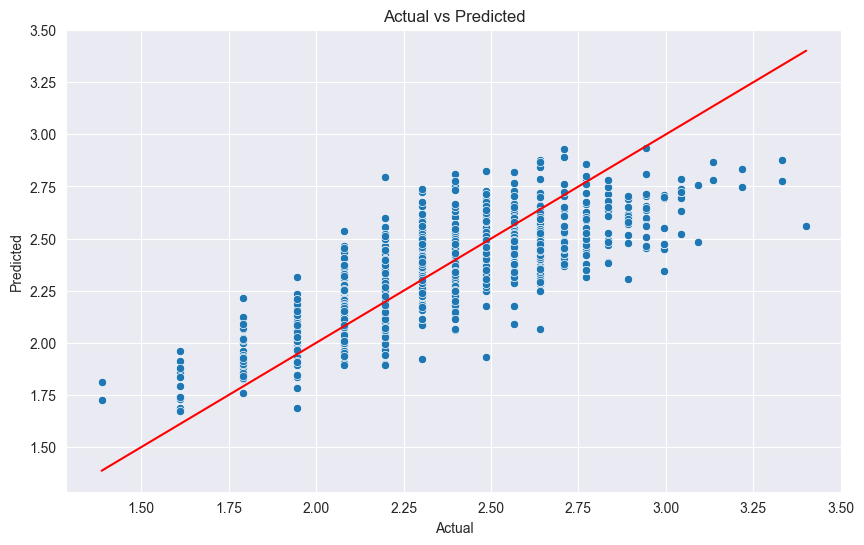

In [157]:
#visualizing the results:

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test.flatten(),y=y_pred.flatten())
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

### [14. SUBMISSION](#14)

In [ ]:
# submission

pred_test = pd.Series(final_gb.predict(X_test))
df['Age'] = pred_test
df.to_csv('submission.csv', index=False)